# Plot average performances per bloc

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import matplotlib.transforms as transforms
import matplotlib
import os

### Load data

In [18]:
dname = os.getcwd() + '/data_v2_quotes/'
dname

'c:\\Users\\Jirko\\Desktop\\Hip_Lab\\analysis_scripts\\data_loading/data_v2_quotes/'

In [19]:
ACCURACY = np.load(dname + 'ACCURACY.npy')
acc_first_prop = np.load(dname + 'Acc_first_prop.npy')
acc_second_prop = np.load(dname + 'acc_second_prop.npy')
acc_third_prop = np.load(dname + 'acc_third_prop.npy')
#BLOC_TYPE = np.load(dname + 'BLOC_TYPE.npy', allow_pickle=True)

In [90]:
n_sujs, n_blocs, n_trials = ACCURACY.shape
# ACCURACY.shape
acc_first_prop.shape
acc_second_prop.shape

(49, 8, 16)

### Plotting parameters

In [21]:
cmap = matplotlib.cm.get_cmap('Set1')
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

In [22]:
bloc_type_colors = {
    'training': cmap(norm(0)),
    'generalization': cmap(norm(.2))
}

# Figure 1 - Accuracy

Plotting function

In [74]:
# from sqlalchemy import false


def plot_accuracy(subj_means, block_mean, block_se, fig_name, fig_title, chance_level=False):
    # Define figure
    fig, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300, facecolor='w')

    # Average per bloc
    for i in range(n_blocs):
        ax.errorbar(
            x = i,
            y = block_mean[i],
            yerr = 2 * block_se[i],
            color = cmap(norm(.2)),
            markersize = 5,
            marker = 'D',
            alpha = 1
        )
    # Individual data
    for i in range(n_blocs):
        ax.plot(
            np.ones(n_sujs) * i + np.random.normal(0, 0.05, (n_sujs)), 
            subj_means[:, i],
            color = cmap(norm(.2)),
            markersize = 3,
            marker = 'o',
            alpha = 0.5, 
            lw = 0
        )
    if chance_level:
        ax.axhline(y=chance_level, color='r', linestyle='--' )
    # Aesthetics
    ax.set_title(fig_title, fontweight='bold')
    ax.set_ylim(0.3, 1.05)
    ax.set_xlabel('Block #')
    ax.set_ylabel('Accuracy')

    plt.tight_layout()
    # fig.savefig(fig_name)
    

### Compute group average

In [92]:
ACCURACY_M_SUJS = np.nanmean(ACCURACY, axis=2)
ACCURACY_M = np.mean(ACCURACY_M_SUJS, axis=0)
ACCURACY_SE = np.std(ACCURACY_M_SUJS, axis=0)/np.sqrt(n_sujs)
ACCURACY_M_SUJS.shape


(49, 8)

### Plot

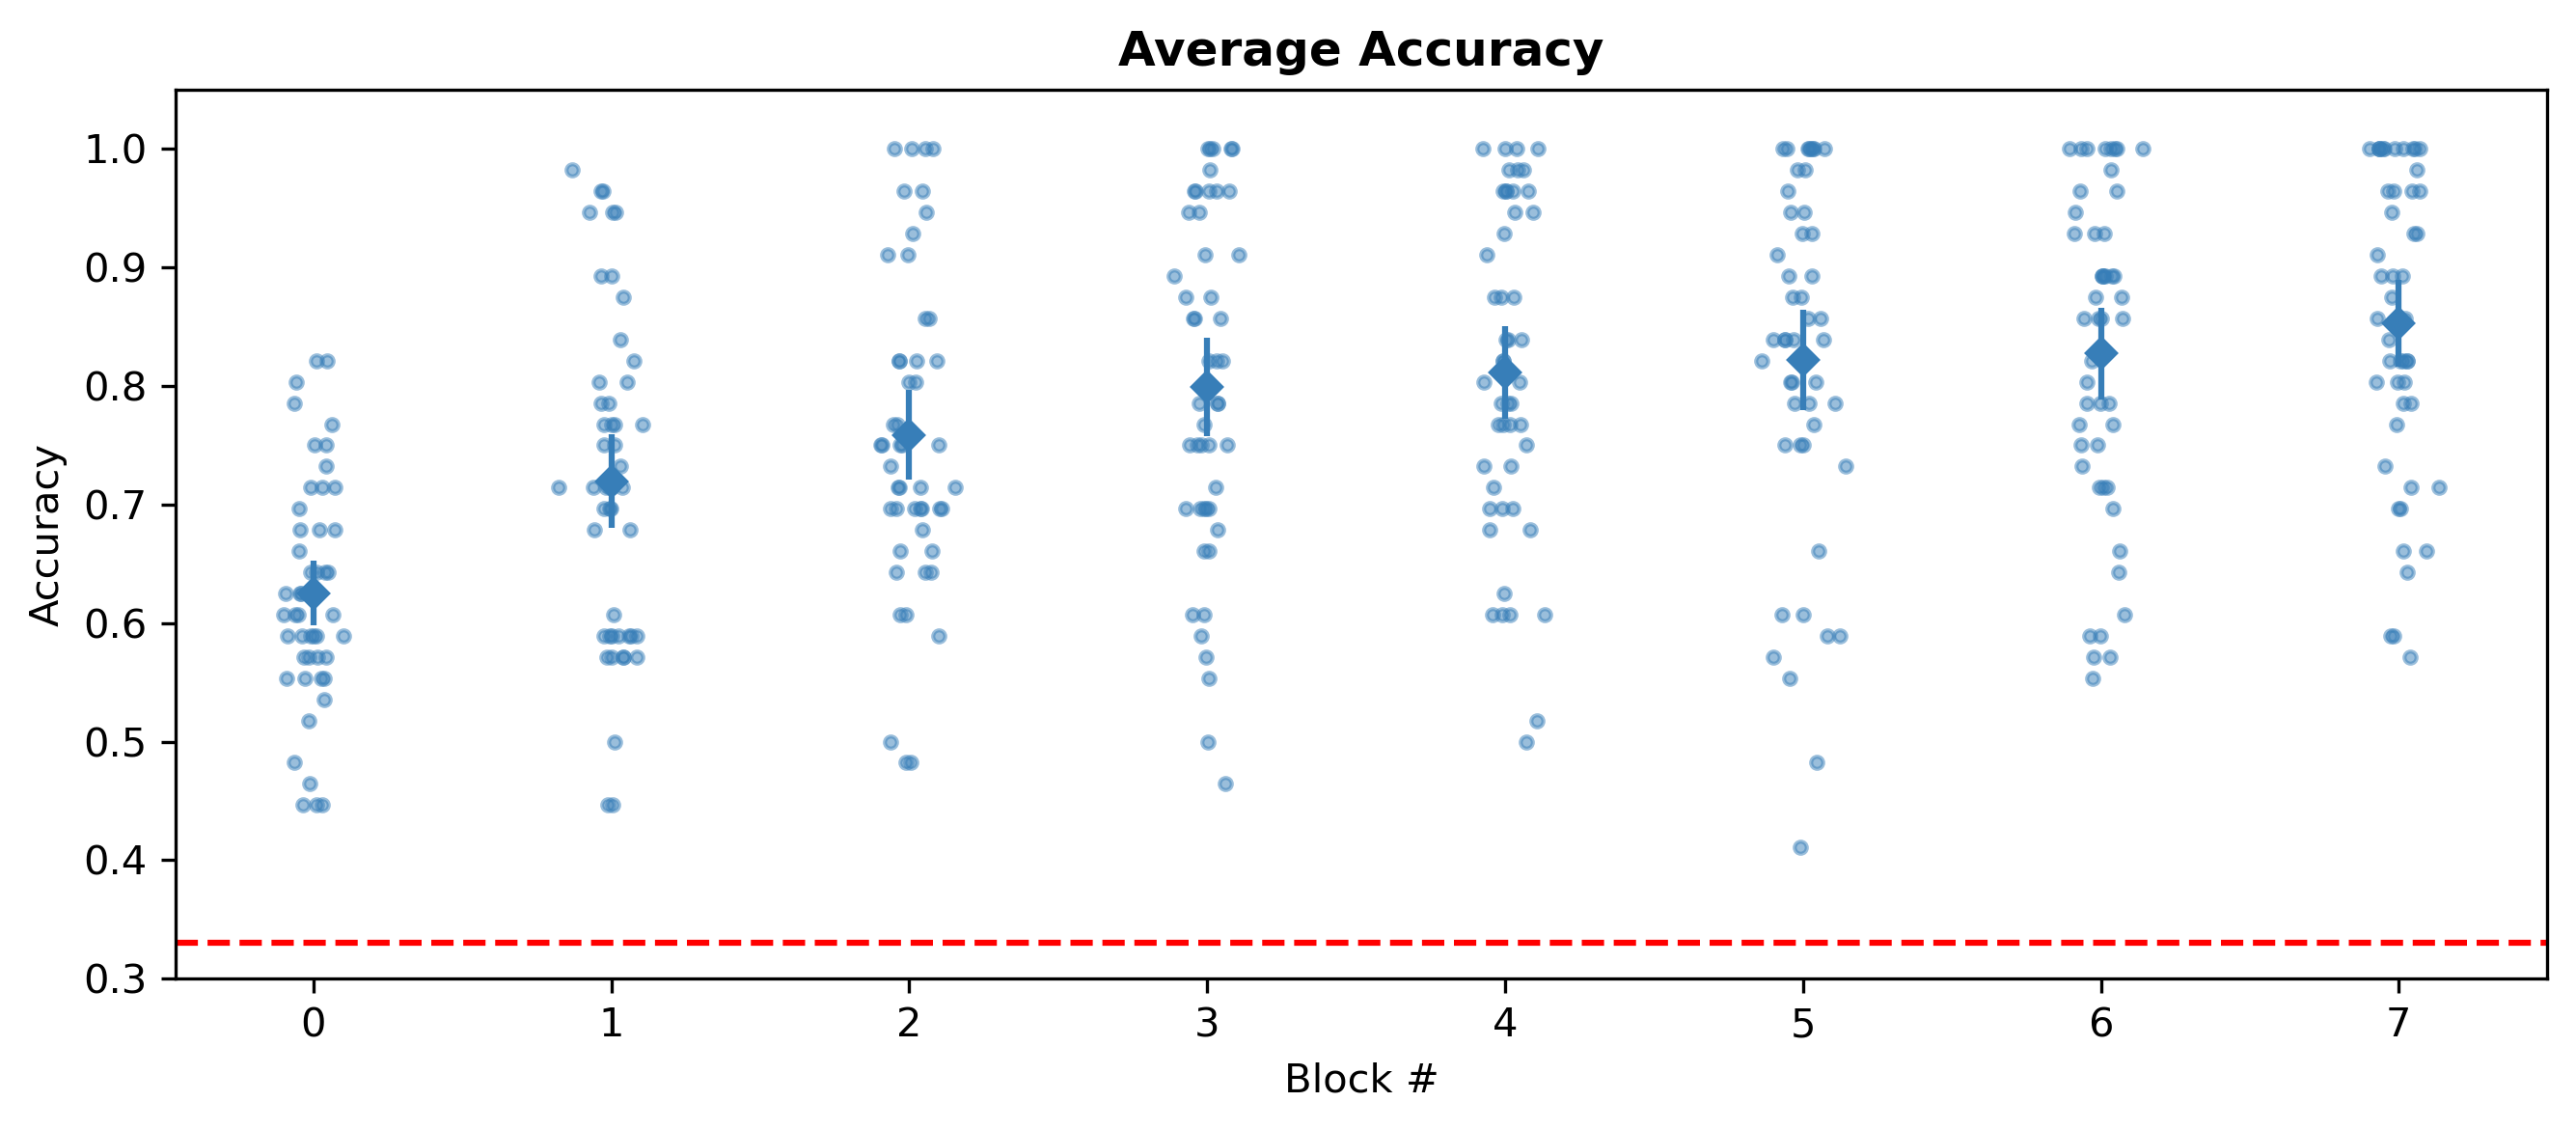

In [76]:

func_name = 'figures_new/fig_1.png'
fig_title = 'Average Accuracy'
chance_level = .33
plot_accuracy(ACCURACY_M_SUJS, ACCURACY_M, ACCURACY_SE,func_name,fig_title, chance_level=chance_level)


Compute the average for the first property

In [71]:
subj_acc_first = np.nanmean(acc_first_prop, axis=2)
mean_acc_first = np.mean(subj_acc_first, axis=0)
se_acc_first = np.std(subj_acc_first, axis=0)/np.sqrt(n_sujs)
mean_acc_first.shape

[0.02044717 0.02575889 0.02224674 0.02129353 0.018165   0.01696075
 0.01548298 0.01347658]


(8,)

Plot

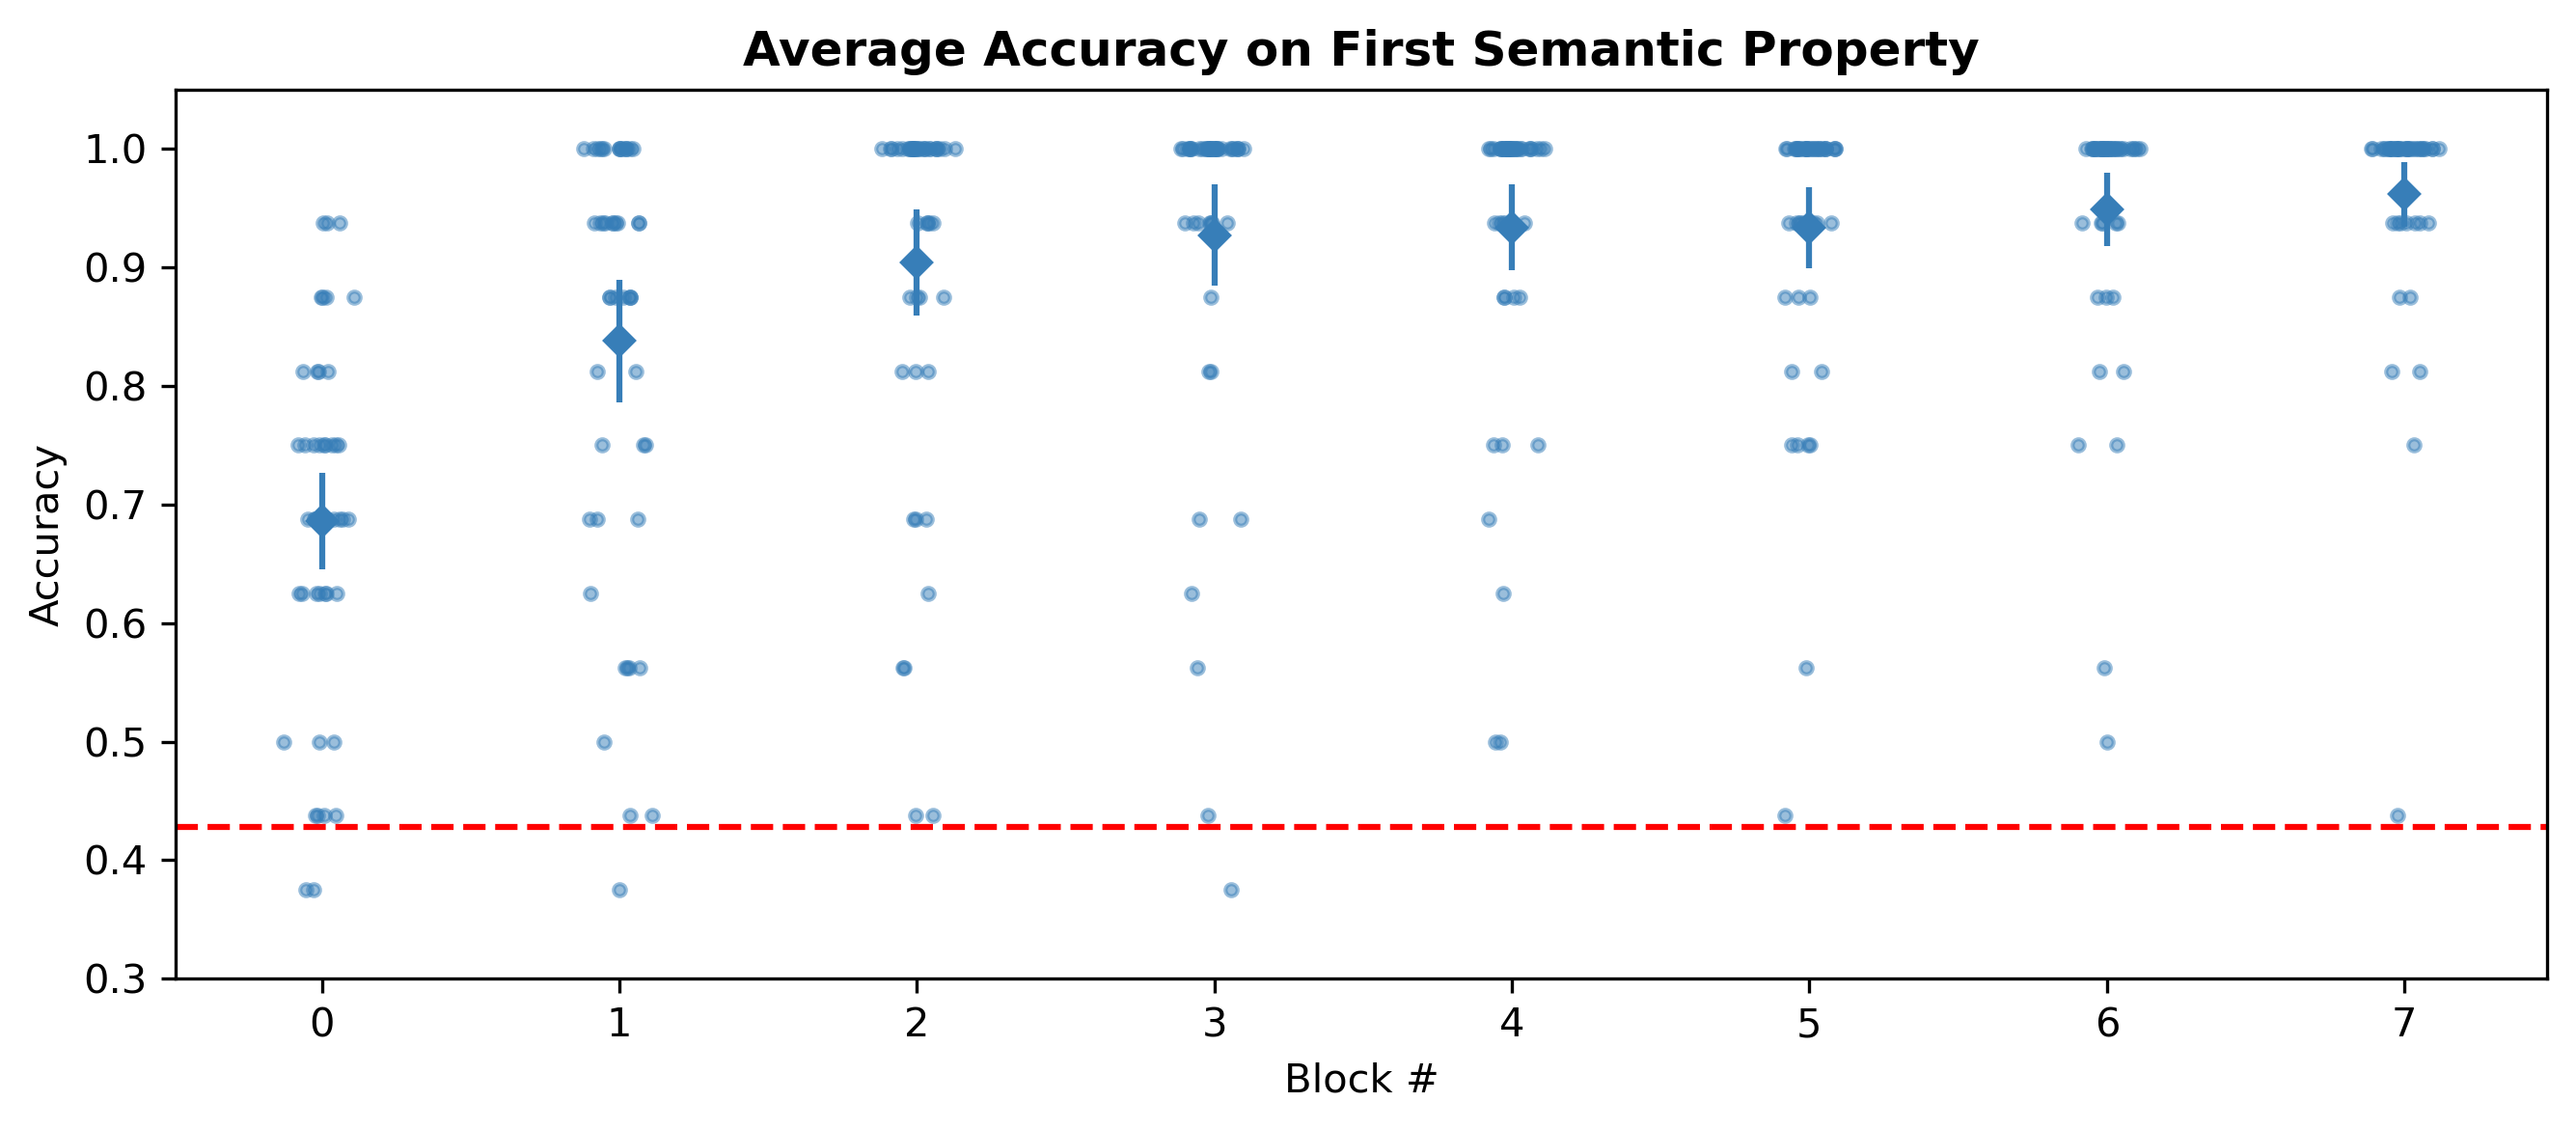

In [77]:
func_name = 'figures_new/fig_2.png'
fig_title = 'Average Accuracy on First Semantic Property'
chance_level = 0.428
plot_accuracy(subj_acc_first, mean_acc_first, se_acc_first, func_name, fig_title, chance_level=chance_level)

Compute average for the second property

In [28]:
subj_acc_second = np.nanmean(acc_second_prop, axis=2)
mean_acc_second = np.mean(subj_acc_second, axis=0)
se_acc_second = np.std(subj_acc_second, axis=0)/np.sqrt(n_sujs)
mean_acc_second.shape

(8,)

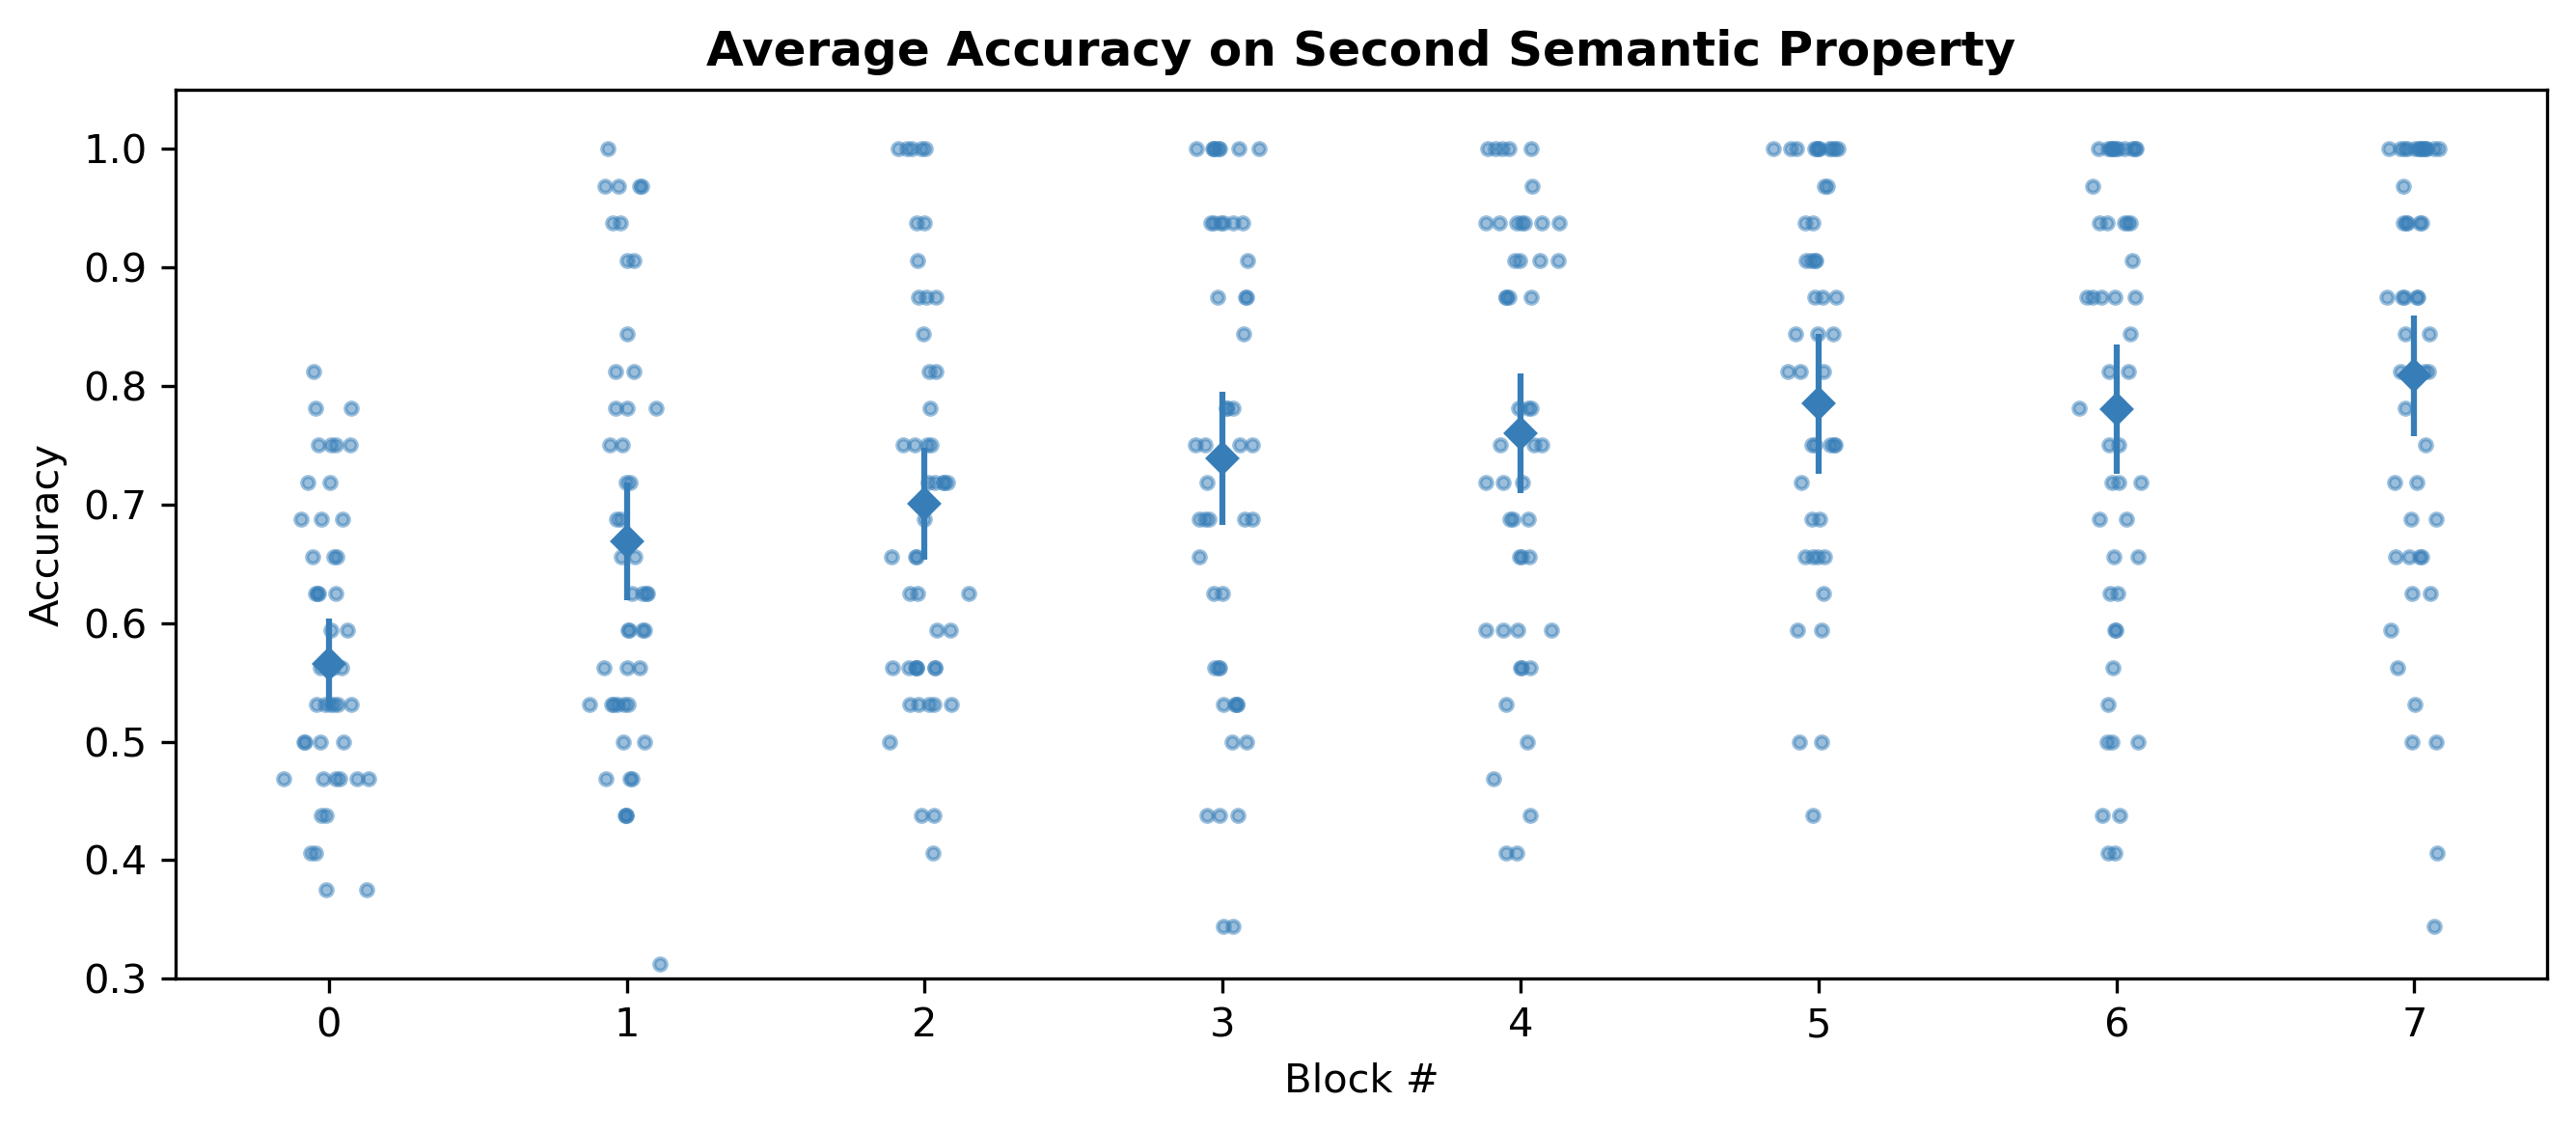

In [78]:
# Define figure
func_name = 'figures_new/fig_3.png'
fig_title = 'Average Accuracy on Second Semantic Property'
# chance_level = 3/7
plot_accuracy(subj_acc_second, mean_acc_second, se_acc_second, func_name, fig_title)

In [73]:
subj_acc_third = np.nanmean(acc_third_prop, axis=2)
mean_acc_third = np.mean(subj_acc_third, axis=0)
se_acc_third = np.std(subj_acc_third, axis=0)/np.sqrt(n_sujs)
mean_acc_third.shape

[0.02044717 0.02575889 0.02224674 0.02129353 0.018165   0.01696075
 0.01548298 0.01347658]
[0.01343803 0.01892951 0.01933795 0.02008923 0.02020634 0.0212119
 0.01961085 0.01891097]
[0.01343803 0.01892951 0.01933795 0.02008923 0.02020634 0.0212119
 0.01961085 0.01891097]


(8,)

In [31]:
# Define figure
func_name = 'figures_new/fig_4.png'
fig_title = 'Average Accuracy on third Semantic Property'
# chance_level = 3/7
# plot_accuracy(subj_acc_third, mean_acc_third, se_acc_third, func_name, fig_title)

Make a plot for all distinctions

In [153]:
# lists for plotting

from matplotlib.transforms import Transform


def plot_accuracy_all_dist(block_mean_list, block_se_list, fig_name, fig_title, chance_level=False):
    # Define figure
    fig, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300, facecolor='w')

    color_list = ['#585c21', '#c35058', '#8488ff']
    marker_list = ['o', 'D', 's']

    offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
    trans = plt.gca().transData
    tran_list = [-8, 0, 8]

    # label list
    label_list = ["First Property", "Second Property", "Third Property"]

    # Average per bloc
    for j, means in enumerate(block_mean_list):
        ax.errorbar(
            x = np.arange(0, n_blocs),
            y = block_mean_list[j],
            yerr = 2* block_se_list[j],
            color = color_list[j],
            markersize = 5,
            marker =  marker_list[j],
            alpha = 1,
            linestyle='',
            transform= trans+offset(tran_list[j]),
            label = label_list[j]
        )

    if chance_level:
        ax.axhline(y=chance_level, color='r', linestyle='--' )

    # Aesthetics
    ax.set_title(fig_title, fontweight='bold')
    ax.set_ylim(0.3, 1.05)
    ax.set_xlabel('Block #')
    ax.set_ylabel('Accuracy')

    # legend
    leg = ax.legend(loc=(.75, .1))

    plt.tight_layout()
    fig.savefig(fig_name)

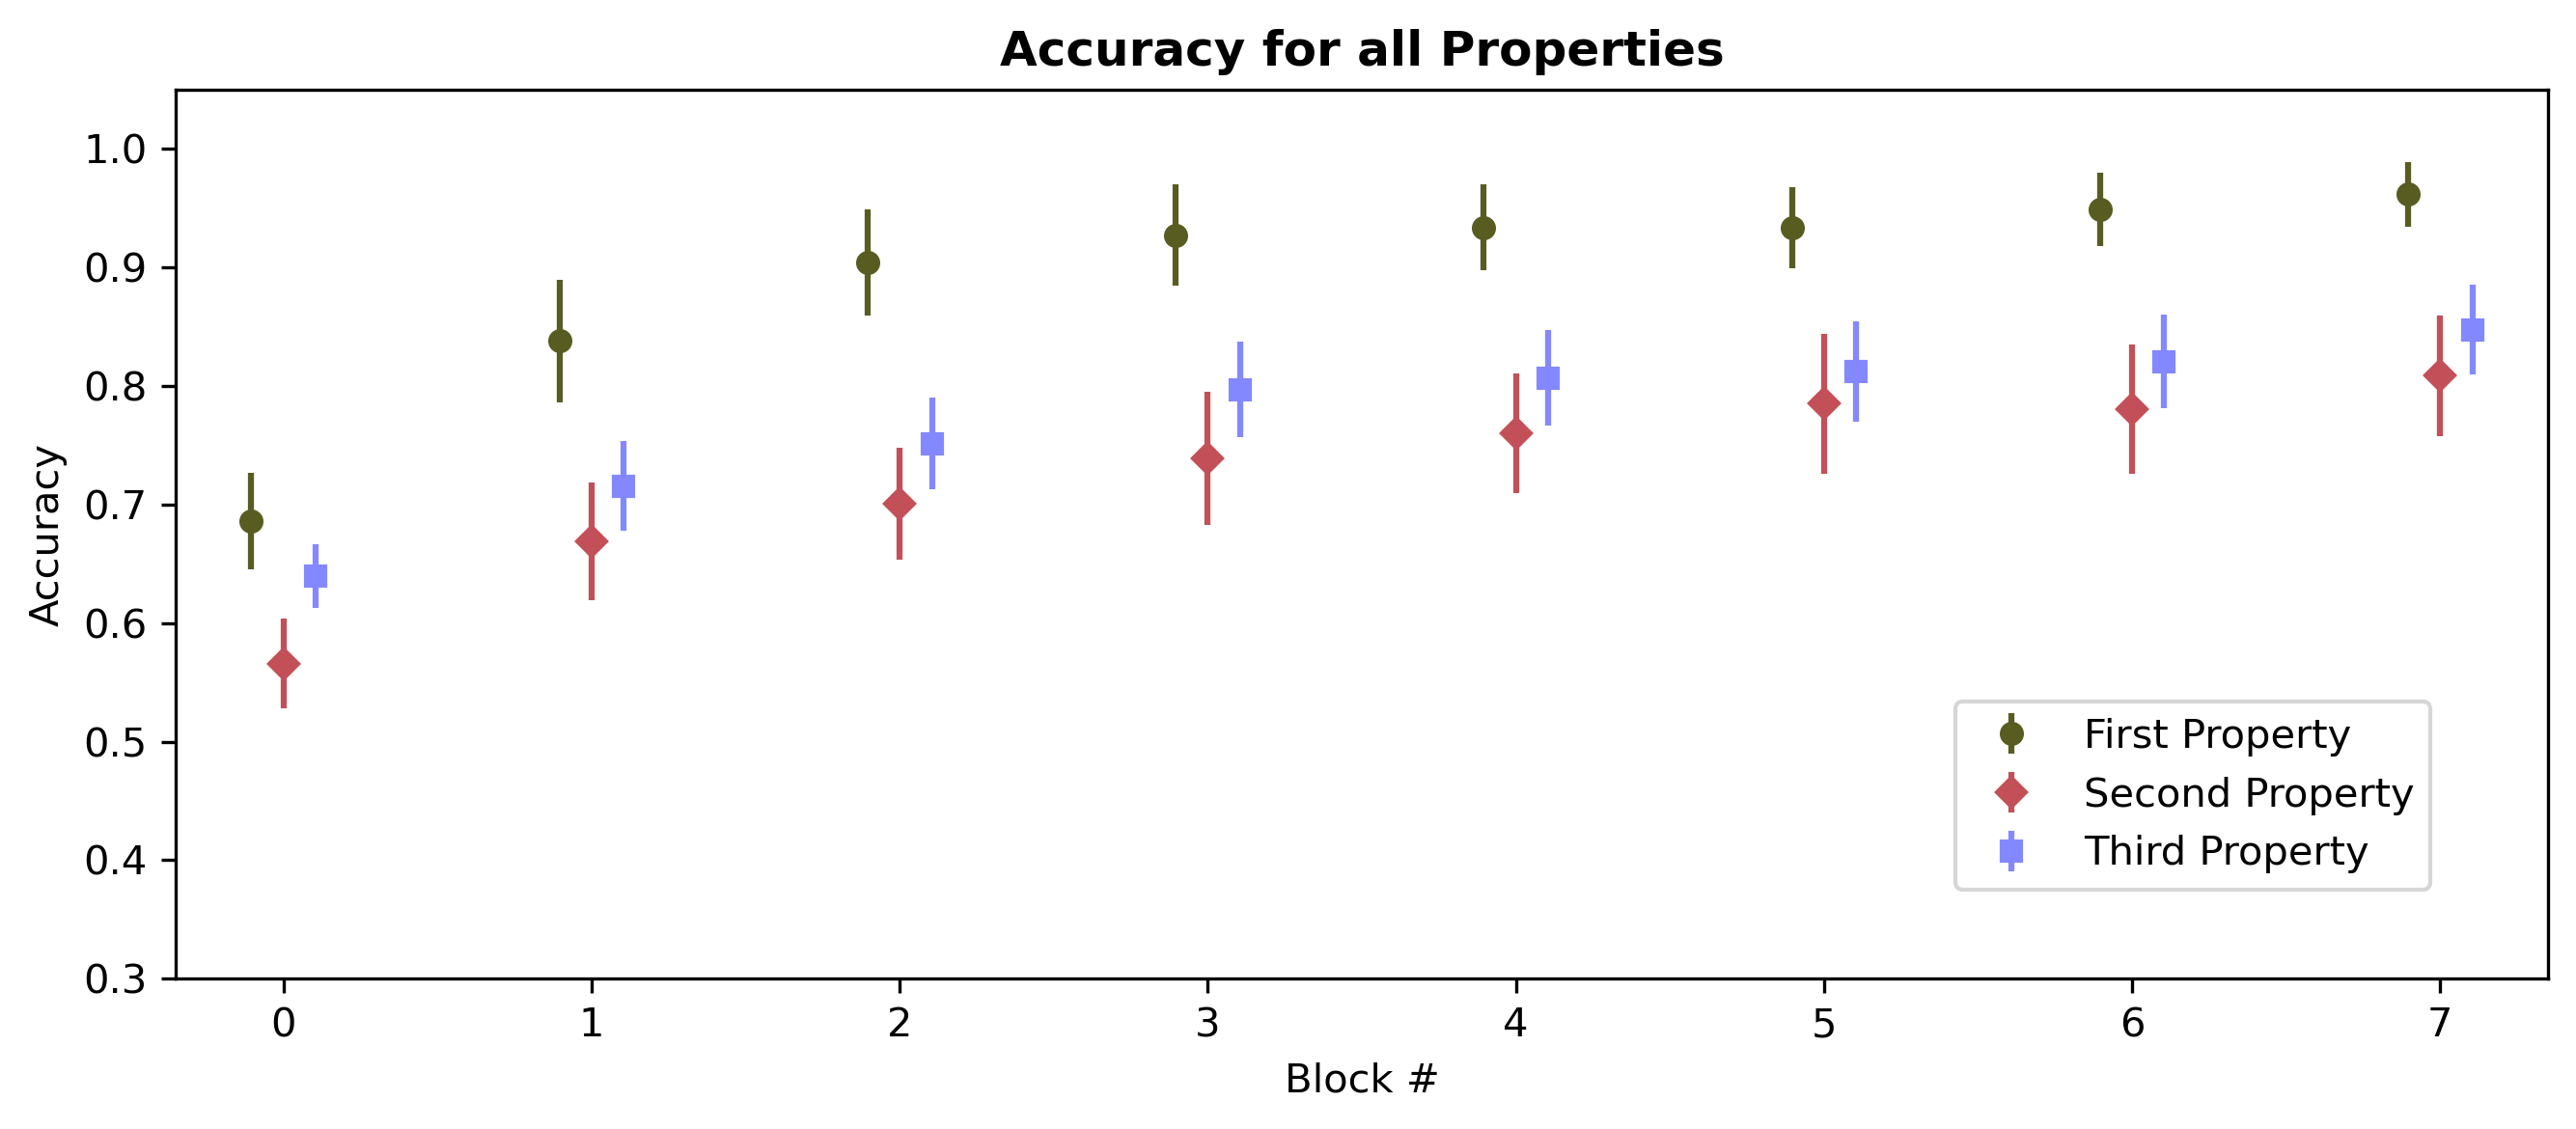

In [154]:
mean_list = [mean_acc_first, mean_acc_second, mean_acc_third]
se_list   = [se_acc_first, se_acc_second, se_acc_third]
plot_accuracy_all_dist(mean_list, se_list, "figures_new/combined_properties.png", "Accuracy for all Properties", chance_level=False)